## Kutubxonalarni yuklash

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Ma'lumotlar to'plamini yuklash

In [27]:
iris_db = pd.read_csv("Iris.csv")
iris_db.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris_db['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Ma'lumotlarni ML model uchun tayyorlash

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_db['target'] = label_encoder.fit_transform(iris_db['Species'])
iris_db.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
44,45,5.1,3.8,1.9,0.4,Iris-setosa,0
116,117,6.5,3.0,5.5,1.8,Iris-virginica,2
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0


In [30]:
iris_db['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
X = iris_db[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_db['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(120, 4)
(30, 4)
(120,)
(30,)


## Modelni o'qitish (Model training)

In [32]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## Bashorat qilish (prediction)

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Model aniqligini baholash

Accuracy score:  1.0

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)


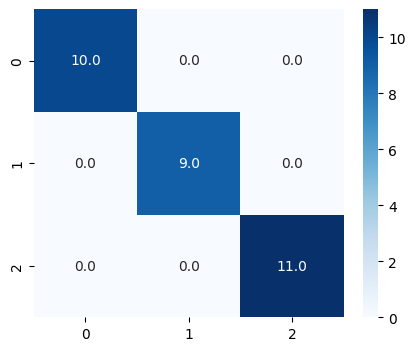

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy score: ', accuracy_score(y_test, y_pred), end = '\n\n')
print('Classification report:', classification_report(y_test, y_pred), sep = '\n', end = '\n\n')
plt.figure(figsize = (5, 4))
print('Confusion matrix:', sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', fmt=".1f"), sep = '\n')
plt.show()

## Modelni saqlash

In [60]:
import joblib

joblib.dump(model, 'Logistic_model.pkl')

loaded_model = joblib.load("Logistic_model.pkl")

loaded_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])